# 5.1.4a Curvas PR

**Propósito:** $\;$ estudiar $\,\hat{y}_{\tau}(\boldsymbol{x})=\mathbb{I}(p(y=1\mid\boldsymbol{x})\geq 1-\tau)\,$ en función de $\,\tau\,$ y con especial atención a positivos ya que la noción de "negativo" no está bien definida

**Ejemplos:** $\;$ casos en los que los negativos son resultado de un algoritmo, no parte de la definición del problema
* **Detección de objetos en visión con patches:** $\;$ el número de negativos depende del total de patches examinados
* **Recuperación de información:** $\;$ el número de negativos (documentos irrelevantes) depende del total de documentos recuperados
* **Problemas de clasificación abiertos:** $\;$ cada clase se interpreta como una clase positiva frente a un conjunto abierto de negativas

**Precisión:** $\;$ fracción de positivos predichos que son verdad
$$\mathcal{P}(\tau)%
=\frac{\operatorname{TP}_{\tau}}{\operatorname{TP}_{\tau}+\operatorname{FP}_{\tau}}%
=\frac{\operatorname{TP}_{\tau}}{\hat{P}_{\tau}}=\operatorname{PPV}_{\tau}$$

**Recall (cobertura):** $\;$ fracción de positivos de verdad que son predichos
$$\mathcal{R}(\tau)%
=\frac{\operatorname{TP}_{\tau}}{\operatorname{TP}_{\tau}+\operatorname{FN}_{\tau}}%
=\frac{\operatorname{TP}_{\tau}}{P}=\operatorname{TPR}_{\tau}$$

**Curva precision-recall (PR):** $\;$ gráfica de $\,\mathcal{P}(\tau)\,$ en función de $\,\mathcal{R}(\tau),\,$ obtenida al variar $\tau$ de $0$ a $1$

**Curvas PR típicas:** $\;$ de dos clasificadores, A y B, siendo el A claramente mejor que el B
* **$\tau=0\,$ (esquina superior izquierda):** $\;$ asumiendo que se predice algún positivo, es de esperar una precisión alta y cobertura baja
* **$\tau=1\,$ (esquina inferior derecha):** $\;$ precisión mínima, $\,P/M\,$ (próxima a $0$), y cobertura $1$ 
* **$0<\tau<1$:** curvas **aproximadamente** decrecientes por encima de la recta horizontal que exhibe un clasificador aleatorio
    * Aproximadamente derecientes: $\;$ si $\tau'\leq\tau$, entonces $\mathcal{R}(\tau')\leq\mathcal{R}(\tau)\,$ y, en general, $\,\mathcal{P}(\tau')\geq\mathcal{P}(\tau),\,$ aunque no necesariamente   
    * Recta horizontal: $\;$ si $\,p(y=1\mid\boldsymbol{x})=\operatorname{Unif}(0, 1),\,\mathcal{R}(\tau)=\frac{\operatorname{TP}_{\tau}}{P}\approx\frac{P\cdot\tau}{P}=\tau\,$ y $\,\mathcal{P}(\tau)=\frac{\operatorname{TP}_{\tau}}{\hat{P}_{\tau}}\approx\frac{P\cdot\tau}{M\cdot\tau}=\frac{P}{M}$

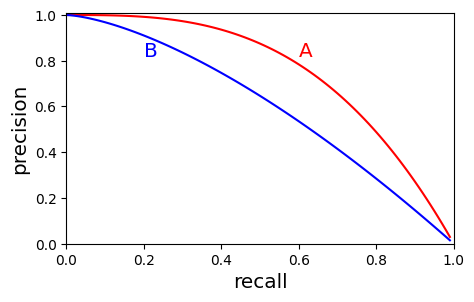

In [1]:
import numpy as np; import matplotlib.pyplot as plt
fA = np.vectorize(lambda x: 1 - x**3); fB = np.vectorize(lambda x: 1 - x**(3/2)); x = np.arange(0, 1, 0.01)
plt.figure(figsize=(5,3)); plt.axis([0, 1, 0, 1.01]); plt.plot(x, fA(x), 'r-'); plt.plot(x, fB(x), 'b-')
plt.text(0.6, 0.82, 'A', color='red', size='x-large'); plt.text(0.2, 0.82, 'B', color='blue', size='x-large')
plt.xlabel('recall', size='x-large'); plt.ylabel('precision', size='x-large');

**Curva PR interpolada:** $\;$ sustituye $\,\mathcal{P}(\tau)\,$ por $\,\max_{\tilde{\tau}\geq\tau} \mathcal{P}(\tilde{\tau})\,$ a fin de suavizar la curva con un comportamiento monótono decreciente

**Curva PR de un clasificador ideal:** $\;$ si $p(y=1\mid\boldsymbol{x})=1$ para las muestras positivas y $0$ para las negativas; la curva PR es en realidad una recta horizontal de precisión máxima salvo en $\tau=1$ (recall $1$), donde caerá abruptamente a precisión $P/M$

## Resumen mediante un escalar

**Propósito:** $\;$ resumir una curva PR mediante algún escalar para facilitar su comparación con otras curvas

**Precisión a $K$:** $\;$ precisión con las $K$ muestras de mayor probabilidad

**Área bajo la curva PR o average precision (AP):** $\;$ en todo el dominio de cobertura o hasta un nivel dado

**AP interpolada:** $\;$ área bajo la curva PR interpolada

**Mean average precision (mAP):** $\;$ AP (interpolada) de una curva PR promedio, por ejemplo de las curvas PR de cada clase en un problema de clasificación abierto

## Clases desequilibradas

**Efecto sobre la curva:** $\;$ la precisión depende en gran medida de la relación entre positivos y negativos, $\,r=\frac{P}{N}$
$$\mathcal{P}(\tau)%
=\frac{\operatorname{TP}_{\tau}}{\operatorname{TP}_{\tau}+\operatorname{FP}_{\tau}}%
=\frac{P\cdot\operatorname{TPR}_{\tau}}{P\cdot\operatorname{TPR}_{\tau}+N\cdot\operatorname{FPR}_{\tau}}%
=\frac{\operatorname{TPR}_{\tau}}{\operatorname{TPR}_{\tau}+\frac{1}{r}\cdot\operatorname{FPR}_{\tau}}
\quad\to\quad\lim_{r\to\infty}\mathcal{P}(\tau)=1\quad\text{y}\quad\lim_{r\to 0}\mathcal{P}(\tau)=0$$